In [1]:
import json 
import pandas as pd 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random as random 

random.seed(42)
np.random.seed(42)

# Get data from image-experiments

In [2]:
with open('dictionary-text-1.json', 'r') as json_file:
    json_content = json_file.read()
    dictionary = pd.read_json(json_content, orient='split')

In [3]:
dictionary

,name,unicode,visual_features,embedding,mixed_features,dataset_count,freq_rank,sample_bias
💯,100,U0001F4AF,"[0.4189754128, 0.3792000413, 0.0, 0.0, 0.0, 0....","[-0.6755447388, -1.5559558868, -3.0156834126, ...",NaN,8464,40,-11
🙏,amen,U0001F64F,"[0.0, 0.3792000413, 0.0, 0.0, 0.0, 0.0, 0.1968...","[0.9185538888, -3.1075770855, -4.734251976, 2....",NaN,36078,6,-1
😩,augh,U0001F629,"[0.0, 0.3792000413, 0.0, 0.0, 0.0, 0.0, 0.1968...","[0.23067000510000002, -0.6407374144, 0.5139456...",NaN,4064,39,6
🎈,balloon,U0001F388,"[0.0, 0.3792000413, 0.0, 0.0, 0.0, 0.0, 0.1968...","[-0.39158439640000003, -0.32773405310000003, -...",NaN,2030,42,25
🎂,bday,U0001F382,"[0.0, 0.3792000413, 0.0, 0.0, 0.0, 0.0, 0.1968...","[-1.2594121695, -1.6188154221, -0.7085679173, ...",NaN,4111,23,21
...,...,...,...,...,...,...,...,...
😢,tear,U0001F622,"[0.0, 0.3792000413, 0.0, 0.0, 0.0, 0.0, 0.1968...","[0.11929614100000001, -0.2858679891, 1.0404829...",NaN,1460,37,38
👍,thumbs-up,U0001F44D,"[0.0, 0.3792000413, 0.0, 0.0, 0.0, 0.0, 0.1968...","[-0.1088959649, 2.221626997, -2.2811396122, 2....",NaN,27457,4,6
😆,top-kek,U0001F606,"[0.0, 0.3792000413, 0.0, 0.0, 0.0, 0.0, 0.1968...","[1.7956736088, -2.324858427, 1.5756766796, 1.4...",NaN,4469,20,21
🙃,topsy,U0001F643,"[0.0, 0.3792000413, 0.0, 0.0, 0.0, 0.0, 0.1968...","[0.6927887797000001, 0.0511431433, 1.193897128...",NaN,1942,53,16


# Normalization and fusion

In [4]:
# Normalize

embeddings = dictionary['embedding'].tolist()
embedding_scaler = StandardScaler()
standardized_embeddings = embedding_scaler.fit_transform(embeddings)

visual_features = dictionary['visual_features'].tolist()
visual_scaler = StandardScaler()
standardized_visual_features = visual_scaler.fit_transform(visual_features)

dictionary['embedding'] = list(standardized_embeddings)

scaler = StandardScaler()
pca = PCA(n_components=94)
reduced_data = pca.fit_transform(standardized_visual_features)
raw_visual_features = list(reduced_data)
reduced_data = scaler.fit_transform(reduced_data)

dictionary['visual_features'] = list(reduced_data)

In [5]:
def concatenation(row, weight_context):
    # Example of a complex function
    print(row['visual_features'].shape, row['embedding'].shape)
    return np.concatenate((row['visual_features'], row['embedding'] * weight_context), axis=0)

In [6]:
dictionary['mixed_features-light'] = dictionary.apply(lambda row: concatenation(row, 0.5), axis=1)
dictionary['mixed_features-medium'] = dictionary.apply(lambda row: concatenation(row, 1.2), axis=1)
dictionary['mixed_features-heavy'] = dictionary.apply(lambda row: concatenation(row, 2), axis=1)

(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)
(94,) (100,)

In [7]:
json_dictionary = dictionary.to_json(orient='split')

with open("dictionary-full.json", 'w') as json_file:
    json_file.write(json_dictionary)

mixed_features = dictionary['mixed_features-light'].tolist()

In [8]:
dictionary

,name,unicode,visual_features,embedding,mixed_features,dataset_count,freq_rank,sample_bias,mixed_features-light,mixed_features-medium,mixed_features-heavy
💯,100,U0001F4AF,"[1.9240137286970438, -0.939013895574446, -1.36...","[-0.900120882383773, -1.0978159405790309, -1.5...",NaN,8464,40,-11,"[1.9240137286970438, -0.939013895574446, -1.36...","[1.9240137286970438, -0.939013895574446, -1.36...","[1.9240137286970438, -0.939013895574446, -1.36..."
🙏,amen,U0001F64F,"[0.7013816156376691, 0.3561289762188438, 1.610...","[0.6764484107155005, -2.0574361202000024, -2.5...",NaN,36078,6,-1,"[0.7013816156376691, 0.3561289762188438, 1.610...","[0.7013816156376691, 0.3561289762188438, 1.610...","[0.7013816156376691, 0.3561289762188438, 1.610..."
😩,augh,U0001F629,"[-1.4927254649562878, -0.331987990322256, -0.0...","[-0.003871231672034146, -0.5317872503208952, 0...",NaN,4064,39,6,"[-1.4927254649562878, -0.331987990322256, -0.0...","[-1.4927254649562878, -0.331987990322256, -0.0...","[-1.4927254649562878, -0.331987990322256, -0.0..."
🎈,balloon,U0001F388,"[1.1792905368587636, -0.9581670994585039, -0.1...","[-0.6192830794180892, -0.33820627704962963, -0...",NaN,2030,42,25,"[1.1792905368587636, -0.9581670994585039, -0.1...","[1.1792905368587636, -0.9581670994585039, -0.1...","[1.1792905368587636, -0.9581670994585039, -0.1..."
🎂,bday,U0001F382,"[0.11124636694621337, 0.4971564367881339, -0.3...","[-1.4775678775350458, -1.1366922324252726, -0....",NaN,4111,23,21,"[0.11124636694621337, 0.4971564367881339, -0.3...","[0.11124636694621337, 0.4971564367881339, -0.3...","[0.11124636694621337, 0.4971564367881339, -0.3..."
...,...,...,...,...,...,...,...,...,...,...,...
😢,tear,U0001F622,"[-1.309055306873991, -0.0243120726282122, -0.1...","[-0.11402038502663525, -0.3123136687961696, 1....",NaN,1460,37,38,"[-1.309055306873991, -0.0243120726282122, -0.1...","[-1.309055306873991, -0.0243120726282122, -0.1...","[-1.309055306873991, -0.0243120726282122, -0.1..."
👍,thumbs-up,U0001F44D,"[0.09325370157394135, -0.44954391319906273, 1....","[-0.33970320092067835, 1.2384790059726456, -1....",NaN,27457,4,6,"[0.09325370157394135, -0.44954391319906273, 1....","[0.09325370157394135, -0.44954391319906273, 1....","[0.09325370157394135, -0.44954391319906273, 1...."
😆,top-kek,U0001F606,"[-1.597628926413723, -0.2396562283003966, -0.2...","[1.5439229778354608, -1.5733536519456612, 1.34...",NaN,4469,20,21,"[-1.597628926413723, -0.2396562283003966, -0.2...","[-1.597628926413723, -0.2396562283003966, -0.2...","[-1.597628926413723, -0.2396562283003966, -0.2..."
🙃,topsy,U0001F643,"[-1.3265506729111896, -0.36613388693410864, -0...","[0.45316590341157964, -0.10388477927151456, 1....",NaN,1942,53,16,"[-1.3265506729111896, -0.36613388693410864, -0...","[-1.3265506729111896, -0.36613388693410864, -0...","[-1.3265506729111896, -0.36613388693410864, -0..."


# Start evaluation of chosen pairs

# Quantitative evaluation

In [9]:
pairs = [
    ("🤡", "🙈"),
    ("😱" ,"🤩"),
    ("💯","✅"),
    ("🎂","🤦"),
    ("😩","😔"),
    ("🍀","😁"),
    ("🤮","😭"),
    ("👏","💐"),
    ("🎈","🎂"),
    ("💀","💩"),
    ("💋","😘"),
    ("💋","😻"),
    ("🤞","🤑"),
    ("🎂","🎉"),
    ("😳","😍"),
    ("🦋","🤑"),
    ("🙏","🐰"),
    ("💐","🌻"),
    ("🤓","😎"),
    ("🌹","🌸"),
    ("☠️","🖕"),
    ("😹","👏"),
    ("🌟","☀️"),
    ("🌞","🙂"),
    ("🤣","😆"),
    ("😻","😁"),
    ("👑","💎"),
    ("😡","🤑"),
    ("💰","💦"),
    ("😈","🤡"),
    ("😎","👀"),
    ("👌","✅"),
    ("💥","😩"),
    ("🥰","😊"),
    ("😂", "🤑"),
    ("😡","💐"),
    ("💕","💖"),
    ("🔥","🙃"),
    ("🤮","🥴"),
    ("🎂","💀"),
    ("🥳","🔥"),
    ("🤦","🌹"),
    ("🙏","💔"),
    ("👏","🤞"),
    ("😁","😂"),
    ("😹","😆"),
    ("🤦","🙋"),
    ("💜","☀️"),
    ("😢", "😩"),
    ("🙃","🙂"),
    ("💪","👌"),
    ("🏃","💔"),
    ("⚡","🔥"),
    ("🙋","💯"),
    ("👏","😢"),
    ("🤔","😈"),
    ("💎","🌿"),
    ("🤔","🌞"),
    ("😈", "👀"),
    ("🍀","💯"),
]


df_pairs = pd.DataFrame(pairs, columns=['Emo1', 'Emo2'])

## Collect distances for visual model

In [10]:
merged_df = pd.merge(dictionary, df_pairs, left_index=True, right_on='Emo1', how='left')
merged_df = merged_df.drop(columns=['name', 'unicode', 'sample_bias', 'mixed_features', 'mixed_features-light', 'mixed_features-medium', 'mixed_features-heavy', 'embedding', 'dataset_count', 'freq_rank'])
merged_df = merged_df.rename(columns={'visual_features': 'embedding_1'})
merged_df = pd.merge(dictionary, merged_df, left_index=True, right_on='Emo2', how='left')
merged_df = merged_df.drop(columns=['name', 'unicode', 'sample_bias', 'embedding', 'mixed_features', 'mixed_features-light', 'mixed_features-medium', 'mixed_features-heavy', 'dataset_count', 'freq_rank'])
merged_df = merged_df.rename(columns={'visual_features': 'embedding_2'})
merged_df = merged_df.dropna()

similarity = cosine_similarity(mixed_features[0].reshape(1, -1), mixed_features[1].reshape(1, -1))

merged_df['embedding_1'] = merged_df.apply(lambda row: np.reshape(row['embedding_1'], (1, -1)), axis=1)
merged_df['embedding_2'] = merged_df.apply(lambda row: np.reshape(row['embedding_2'], (1, -1)), axis=1)
merged_df['visual_distances'] = merged_df.apply(lambda row: cosine_similarity(row['embedding_1'], row['embedding_2']), axis=1)
visual_distances = merged_df

## Collect distances for textual model

In [11]:
merged_df = pd.merge(dictionary, df_pairs, left_index=True, right_on='Emo1', how='left')
merged_df = merged_df.drop(columns=['name', 'unicode', 'sample_bias', 'mixed_features', 'mixed_features-light', 'mixed_features-medium', 'mixed_features-heavy', 'visual_features', 'dataset_count', 'freq_rank'])
merged_df = merged_df.rename(columns={'embedding': 'embedding_1'})
merged_df = pd.merge(dictionary, merged_df, left_index=True, right_on='Emo2', how='left')
merged_df = merged_df.drop(columns=['name', 'unicode', 'sample_bias', 'visual_features', 'mixed_features', 'mixed_features-light', 'mixed_features-medium', 'mixed_features-heavy', 'dataset_count', 'freq_rank'])
merged_df = merged_df.rename(columns={'embedding': 'embedding_2'})
merged_df = merged_df.dropna()

similarity = cosine_similarity(mixed_features[0].reshape(1, -1), mixed_features[1].reshape(1, -1))

merged_df['embedding_1'] = merged_df.apply(lambda row: np.reshape(row['embedding_1'], (1, -1)), axis=1)
merged_df['embedding_2'] = merged_df.apply(lambda row: np.reshape(row['embedding_2'], (1, -1)), axis=1)
merged_df['textual_distances'] = merged_df.apply(lambda row: cosine_similarity(row['embedding_1'], row['embedding_2']), axis=1)
textual_distances = merged_df

## Collect distances for multimodal model

### Lightweight context

In [12]:
merged_df = pd.merge(dictionary, df_pairs, left_index=True, right_on='Emo1', how='left')
merged_df = merged_df.drop(columns=['name', 'unicode', 'sample_bias', 'mixed_features', 'embedding', 'mixed_features-medium', 'mixed_features-heavy', 'visual_features', 'dataset_count', 'freq_rank'])
merged_df = merged_df.rename(columns={'mixed_features-light': 'embedding_1'})
merged_df = pd.merge(dictionary, merged_df, left_index=True, right_on='Emo2', how='left')
merged_df = merged_df.drop(columns=['name', 'unicode', 'sample_bias', 'visual_features', 'mixed_features', 'embedding', 'mixed_features-medium', 'mixed_features-heavy', 'dataset_count', 'freq_rank'])
merged_df = merged_df.rename(columns={'mixed_features-light': 'embedding_2'})
merged_df = merged_df.dropna()

similarity = cosine_similarity(mixed_features[0].reshape(1, -1), mixed_features[1].reshape(1, -1))

merged_df['embedding_1'] = merged_df.apply(lambda row: np.reshape(row['embedding_1'], (1, -1)), axis=1)
merged_df['embedding_2'] = merged_df.apply(lambda row: np.reshape(row['embedding_2'], (1, -1)), axis=1)
merged_df['light_mix_distances'] = merged_df.apply(lambda row: cosine_similarity(row['embedding_1'], row['embedding_2']), axis=1)
lightweight_distances = merged_df

### Mediumweight context


In [13]:
merged_df = pd.merge(dictionary, df_pairs, left_index=True, right_on='Emo1', how='left')
merged_df = merged_df.drop(columns=['name', 'unicode', 'sample_bias', 'mixed_features', 'embedding', 'mixed_features-light', 'mixed_features-heavy', 'visual_features', 'dataset_count', 'freq_rank'])
merged_df = merged_df.rename(columns={'mixed_features-medium': 'embedding_1'})
merged_df = pd.merge(dictionary, merged_df, left_index=True, right_on='Emo2', how='left')
merged_df = merged_df.drop(columns=['name', 'unicode', 'sample_bias', 'visual_features', 'mixed_features', 'embedding', 'mixed_features-light', 'mixed_features-heavy', 'dataset_count', 'freq_rank'])
merged_df = merged_df.rename(columns={'mixed_features-medium': 'embedding_2'})
merged_df = merged_df.dropna()

similarity = cosine_similarity(mixed_features[0].reshape(1, -1), mixed_features[1].reshape(1, -1))

merged_df['embedding_1'] = merged_df.apply(lambda row: np.reshape(row['embedding_1'], (1, -1)), axis=1)
merged_df['embedding_2'] = merged_df.apply(lambda row: np.reshape(row['embedding_2'], (1, -1)), axis=1)
merged_df['medium_mix_distances'] = merged_df.apply(lambda row: cosine_similarity(row['embedding_1'], row['embedding_2']), axis=1)
mediumweight_distances = merged_df

### Heavyweight context

In [14]:
merged_df = pd.merge(dictionary, df_pairs, left_index=True, right_on='Emo1', how='left')
merged_df = merged_df.drop(columns=['name', 'unicode', 'sample_bias', 'mixed_features', 'embedding', 'mixed_features-light', 'mixed_features-medium', 'visual_features', 'dataset_count', 'freq_rank'])
merged_df = merged_df.rename(columns={'mixed_features-heavy': 'embedding_1'})
merged_df = pd.merge(dictionary, merged_df, left_index=True, right_on='Emo2', how='left')
merged_df = merged_df.drop(columns=['name', 'unicode', 'sample_bias', 'visual_features', 'mixed_features', 'embedding', 'mixed_features-light', 'mixed_features-medium', 'dataset_count', 'freq_rank'])
merged_df = merged_df.rename(columns={'mixed_features-heavy': 'embedding_2'})
merged_df = merged_df.dropna()

similarity = cosine_similarity(mixed_features[0].reshape(1, -1), mixed_features[1].reshape(1, -1))

merged_df['embedding_1'] = merged_df.apply(lambda row: np.reshape(row['embedding_1'], (1, -1)), axis=1)
merged_df['embedding_2'] = merged_df.apply(lambda row: np.reshape(row['embedding_2'], (1, -1)), axis=1)
merged_df['heavy_mix_distances'] = merged_df.apply(lambda row: cosine_similarity(row['embedding_1'], row['embedding_2']), axis=1)
heavyweight_distances = merged_df

In [15]:
merged_df = pd.merge(df_pairs, textual_distances, on=['Emo1', 'Emo2'], how='left')
merged_df = merged_df.drop(columns=['embedding_1', 'embedding_2'])
merged_df = pd.merge(merged_df, visual_distances, on=['Emo1', 'Emo2'], how='left')
merged_df = merged_df.drop(columns=['embedding_1', 'embedding_2'])
merged_df = pd.merge(merged_df, lightweight_distances, on=['Emo1', 'Emo2'], how='left')
merged_df = merged_df.drop(columns=['embedding_1', 'embedding_2'])
merged_df = pd.merge(merged_df, mediumweight_distances, on=['Emo1', 'Emo2'], how='left')
merged_df = merged_df.drop(columns=['embedding_1', 'embedding_2'])
merged_df = pd.merge(merged_df, heavyweight_distances, on=['Emo1', 'Emo2'], how='left')
merged_df = merged_df.drop(columns=['embedding_1', 'embedding_2'])

In [16]:
with open('data.json', 'r') as file:
    gold = json.load(file)

merged_df['gold_V'] = gold['gold_valence']
merged_df['gold_A'] = gold['gold_arousal']
merged_df['gold_S'] = gold['gold_similarity']
merged_df['gold_R'] = gold['gold_relatedness']
merged_df['gold_VA'] = gold['gold_VA']
merged_df['gold_SR'] = gold['gold_SR']
merged_df['gold_avg'] = gold['gold_avg']
full_data = merged_df

def extract_float(nested_list):
    return nested_list[0][0]

columns_to_convert = ['textual_distances', 'visual_distances', 'light_mix_distances', 'medium_mix_distances', 'heavy_mix_distances']

for column in columns_to_convert:
    full_data[column] = full_data[column].apply(extract_float)

In [17]:
textual_model_corr_scores = {
    "V": full_data['textual_distances'].corr(full_data['gold_V']),
    "A": full_data['textual_distances'].corr(full_data['gold_A']),
    "S": full_data['textual_distances'].corr(full_data['gold_S']),
    "R": full_data['textual_distances'].corr(full_data['gold_R']),
    "VA": full_data['textual_distances'].corr(full_data['gold_VA']),
    "SR": full_data['textual_distances'].corr(full_data['gold_SR']),
    "AVG": full_data['textual_distances'].corr(full_data['gold_avg']),
}

textual_model_corr_scores

{'V': 0.5132804360316497,
 'A': 0.43624767052646474,
 'S': 0.5395334450487994,
 'R': 0.4544830177175257,
 'VA': 0.4942529480443797,
 'SR': 0.5158908098998355,
 'AVG': 0.5100083854614224}

In [18]:
visual_model_corr_scores = {
    "V": full_data['visual_distances'].corr(full_data['gold_V']),
    "A": full_data['visual_distances'].corr(full_data['gold_A']),
    "S": full_data['visual_distances'].corr(full_data['gold_S']),
    "R": full_data['visual_distances'].corr(full_data['gold_R']),
    "VA": full_data['visual_distances'].corr(full_data['gold_VA']),
    "SR": full_data['visual_distances'].corr(full_data['gold_SR']),
    "AVG": full_data['visual_distances'].corr(full_data['gold_avg']),
}

visual_model_corr_scores

{'V': 0.10976507446511803,
 'A': 0.031807293769651614,
 'S': 0.06349527811007662,
 'R': 0.017226563620623372,
 'VA': 0.07785416447444829,
 'SR': 0.0428925309618467,
 'AVG': 0.0598116184852745}

In [19]:
lightweight_model_corr_scores = {
    "V": full_data['light_mix_distances'].corr(full_data['gold_V']),
    "A": full_data['light_mix_distances'].corr(full_data['gold_A']),
    "S": full_data['light_mix_distances'].corr(full_data['gold_S']),
    "R": full_data['light_mix_distances'].corr(full_data['gold_R']),
    "VA": full_data['light_mix_distances'].corr(full_data['gold_VA']),
    "SR": full_data['light_mix_distances'].corr(full_data['gold_SR']),
    "AVG": full_data['light_mix_distances'].corr(full_data['gold_avg']),
}

lightweight_model_corr_scores

{'V': 0.5956265682134781,
 'A': 0.49754135455221066,
 'S': 0.5855912918867116,
 'R': 0.5538075121263828,
 'VA': 0.5696095853201538,
 'SR': 0.5896774319927002,
 'AVG': 0.5851627069393367}

In [20]:
mediumweight_model_corr_scores = {
    "V": full_data['medium_mix_distances'].corr(full_data['gold_V']),
    "A": full_data['medium_mix_distances'].corr(full_data['gold_A']),
    "S": full_data['medium_mix_distances'].corr(full_data['gold_S']),
    "R": full_data['medium_mix_distances'].corr(full_data['gold_R']),
    "VA": full_data['medium_mix_distances'].corr(full_data['gold_VA']),
    "SR": full_data['medium_mix_distances'].corr(full_data['gold_SR']),
    "AVG": full_data['medium_mix_distances'].corr(full_data['gold_avg']),
}

mediumweight_model_corr_scores

{'V': 0.6185571457809363,
 'A': 0.520542596176461,
 'S': 0.625615503030877,
 'R': 0.5696639754293811,
 'VA': 0.5932804848200408,
 'SR': 0.6191709224930289,
 'AVG': 0.6121483905739243}

In [21]:
heavyweight_model_corr_scores = {
    "V": full_data['heavy_mix_distances'].corr(full_data['gold_V']),
    "A": full_data['heavy_mix_distances'].corr(full_data['gold_A']),
    "S": full_data['heavy_mix_distances'].corr(full_data['gold_S']),
    "R": full_data['heavy_mix_distances'].corr(full_data['gold_R']),
    "VA": full_data['heavy_mix_distances'].corr(full_data['gold_VA']),
    "SR": full_data['heavy_mix_distances'].corr(full_data['gold_SR']),
    "AVG": full_data['heavy_mix_distances'].corr(full_data['gold_avg']),
}

heavyweight_model_corr_scores

{'V': 0.5998637598825142,
 'A': 0.5078181260843537,
 'S': 0.6168781612758684,
 'R': 0.5467146724848155,
 'VA': 0.5767125601668047,
 'SR': 0.6031548349111158,
 'AVG': 0.5957354870507175}

In [22]:

print("Difference on performance for valence")
print(f"+ {(mediumweight_model_corr_scores['V'] - textual_model_corr_scores['V']) * 100:.3f} %")
print("Difference on performance for arousal")
print(f"+ {(mediumweight_model_corr_scores['A'] - textual_model_corr_scores['A']) * 100:.3f} %")
print("Difference on performance for similarity")
print(f"+ {(mediumweight_model_corr_scores['S'] - textual_model_corr_scores['S']) * 100:.3f} %")
print("Difference on performance for relatedness")
print(f"+ {(mediumweight_model_corr_scores['R'] - textual_model_corr_scores['R']) * 100:.3f} %")
print("Difference on performance for emotion")
print(f"+ {(mediumweight_model_corr_scores['VA'] - textual_model_corr_scores['VA']) * 100:.3f} %")
print("Difference on performance for language")
print(f"+ {(mediumweight_model_corr_scores['SR'] - textual_model_corr_scores['SR']) * 100:.3f} %")
print("Difference on performance average")
print(f"+ {(mediumweight_model_corr_scores['AVG'] - textual_model_corr_scores['AVG']) * 100:.3f} %")

Difference on performance for valence
+ 10.528 %
Difference on performance for arousal
+ 8.429 %
Difference on performance for similarity
+ 8.608 %
Difference on performance for relatedness
+ 11.518 %
Difference on performance for emotion
+ 9.903 %
Difference on performance for language
+ 10.328 %
Difference on performance average
+ 10.214 %


# Qualitative evaluation

In [23]:
df_quality = dictionary
tsne =  TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, n_iter=10000, perplexity=7)

C:\Users\aless\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aless\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aless\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

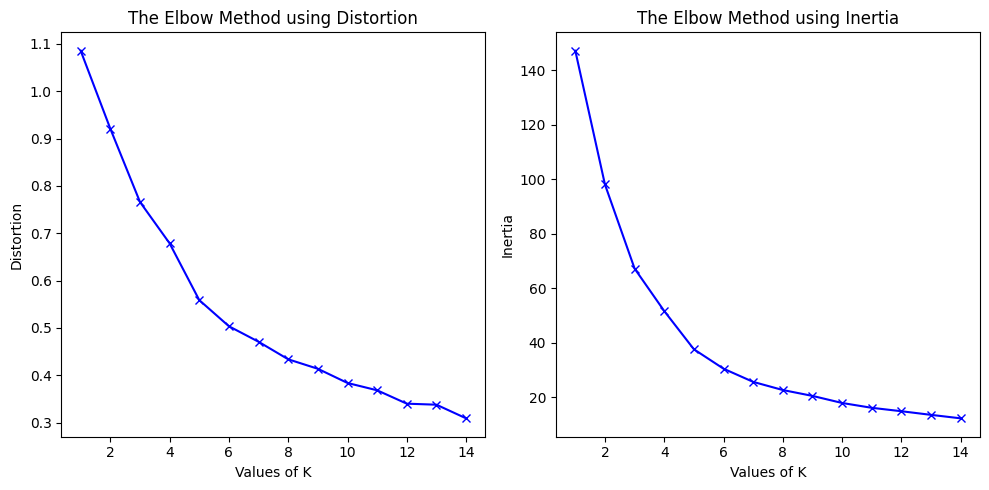

In [24]:
embeddings = np.array(dictionary['visual_features'].tolist())
# embeddings = scaler.fit_transform(embeddings)
X = tsne.fit_transform(embeddings)

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)

    # Calculate distortions
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')

plt.subplot(1, 2, 2)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')

plt.tight_layout()
plt.show()

In [25]:
embeddings = np.array(dictionary['embedding'].tolist())
embeddings = tsne.fit_transform(embeddings)
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(embeddings)

df_quality['embedding_clusters'] = clusters

visual_features = np.array(raw_visual_features)
tsne_img = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, n_iter=10000, perplexity=7)
visual_features = tsne_img.fit_transform(visual_features)
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(visual_features)

df_quality['visual_clusters'] = clusters

light_mix = np.array(dictionary['mixed_features-light'].tolist())
light_mix = tsne.fit_transform(light_mix)
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(light_mix)

df_quality['light_clusters'] = clusters

medium_mix = np.array(dictionary['mixed_features-medium'].tolist())
medium_mix = tsne.fit_transform(medium_mix)
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(medium_mix)

df_quality['medium_clusters'] = clusters

heavy_mix = np.array(dictionary['mixed_features-heavy'].tolist())
heavy_mix = tsne.fit_transform(heavy_mix)
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(heavy_mix)

df_quality['heavy_clusters'] = clusters


C:\Users\aless\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aless\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aless\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

In [26]:
df_quality.drop(columns=['mixed_features', 'dataset_count', 'freq_rank', 'sample_bias'])

,name,unicode,visual_features,embedding,mixed_features-light,mixed_features-medium,mixed_features-heavy,embedding_clusters,visual_clusters,light_clusters,medium_clusters,heavy_clusters
💯,100,U0001F4AF,"[1.9240137286970438, -0.939013895574446, -1.36...","[-0.900120882383773, -1.0978159405790309, -1.5...","[1.9240137286970438, -0.939013895574446, -1.36...","[1.9240137286970438, -0.939013895574446, -1.36...","[1.9240137286970438, -0.939013895574446, -1.36...",1,2,5,0,3
🙏,amen,U0001F64F,"[0.7013816156376691, 0.3561289762188438, 1.610...","[0.6764484107155005, -2.0574361202000024, -2.5...","[0.7013816156376691, 0.3561289762188438, 1.610...","[0.7013816156376691, 0.3561289762188438, 1.610...","[0.7013816156376691, 0.3561289762188438, 1.610...",5,4,5,0,3
😩,augh,U0001F629,"[-1.4927254649562878, -0.331987990322256, -0.0...","[-0.003871231672034146, -0.5317872503208952, 0...","[-1.4927254649562878, -0.331987990322256, -0.0...","[-1.4927254649562878, -0.331987990322256, -0.0...","[-1.4927254649562878, -0.331987990322256, -0.0...",0,1,2,3,2
🎈,balloon,U0001F388,"[1.1792905368587636, -0.9581670994585039, -0.1...","[-0.6192830794180892, -0.33820627704962963, -0...","[1.1792905368587636, -0.9581670994585039, -0.1...","[1.1792905368587636, -0.9581670994585039, -0.1...","[1.1792905368587636, -0.9581670994585039, -0.1...",4,5,1,5,5
🎂,bday,U0001F382,"[0.11124636694621337, 0.4971564367881339, -0.3...","[-1.4775678775350458, -1.1366922324252726, -0....","[0.11124636694621337, 0.4971564367881339, -0.3...","[0.11124636694621337, 0.4971564367881339, -0.3...","[0.11124636694621337, 0.4971564367881339, -0.3...",4,3,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
😢,tear,U0001F622,"[-1.309055306873991, -0.0243120726282122, -0.1...","[-0.11402038502663525, -0.3123136687961696, 1....","[-1.309055306873991, -0.0243120726282122, -0.1...","[-1.309055306873991, -0.0243120726282122, -0.1...","[-1.309055306873991, -0.0243120726282122, -0.1...",0,1,2,3,2
👍,thumbs-up,U0001F44D,"[0.09325370157394135, -0.44954391319906273, 1....","[-0.33970320092067835, 1.2384790059726456, -1....","[0.09325370157394135, -0.44954391319906273, 1....","[0.09325370157394135, -0.44954391319906273, 1....","[0.09325370157394135, -0.44954391319906273, 1....",3,4,0,1,4
😆,top-kek,U0001F606,"[-1.597628926413723, -0.2396562283003966, -0.2...","[1.5439229778354608, -1.5733536519456612, 1.34...","[-1.597628926413723, -0.2396562283003966, -0.2...","[-1.597628926413723, -0.2396562283003966, -0.2...","[-1.597628926413723, -0.2396562283003966, -0.2...",3,6,0,4,0
🙃,topsy,U0001F643,"[-1.3265506729111896, -0.36613388693410864, -0...","[0.45316590341157964, -0.10388477927151456, 1....","[-1.3265506729111896, -0.36613388693410864, -0...","[-1.3265506729111896, -0.36613388693410864, -0...","[-1.3265506729111896, -0.36613388693410864, -0...",0,1,2,3,2


(94, 94)


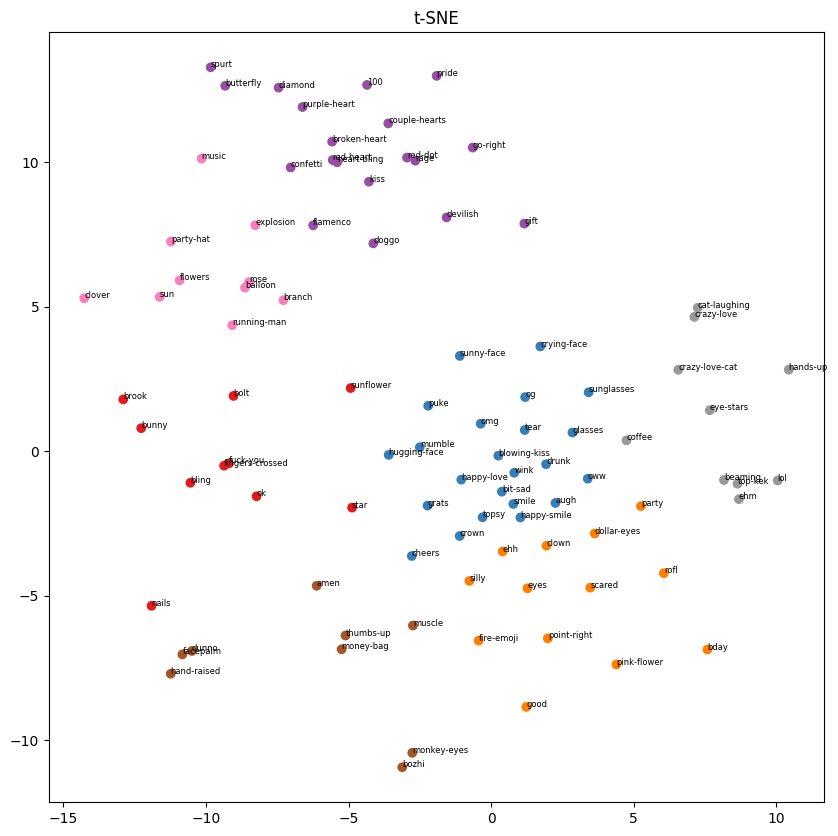

In [27]:
X = raw_visual_features
X = np.array(X)

n_samples, n_features = X.shape

print(X.shape)

X = X.reshape(n_samples, -1)

X_embedded = tsne_img.fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=['tsne_feature1', 'tsne_feature2'])

df_tsne['emoji_name'] = df_quality['name'].tolist()
df_tsne['emoji'] = df_quality.index
df_tsne['cluster'] = df_quality['visual_clusters'].tolist()

plt.figure(figsize=(10, 10))

plt.scatter(df_tsne['tsne_feature1'], df_tsne['tsne_feature2'], c=df_tsne['cluster'], cmap='Set1')

# Set labels and title
plt.title('t-SNE')

for i, txt in enumerate(df_tsne['emoji_name']):
    plt.annotate(txt, (df_tsne['tsne_feature1'][i], df_tsne['tsne_feature2'][i]), fontsize=6)

plt.savefig('visual-tsne.jpg')

(94, 100)


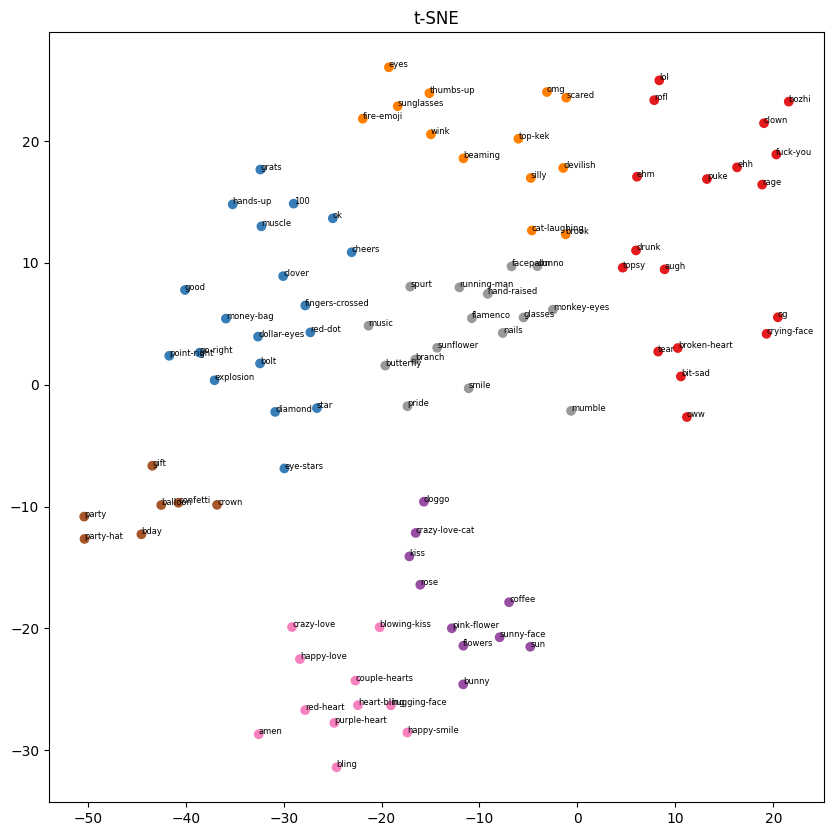

In [28]:
X = df_quality['embedding'].tolist()
X = np.array(X)

n_samples, n_features = X.shape

print(X.shape)

X = X.reshape(n_samples, -1)

X_embedded = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=['tsne_feature1', 'tsne_feature2'])

df_tsne['emoji_name'] = df_quality['name'].tolist()
df_tsne['emoji'] = df_quality.index
df_tsne['cluster'] = df_quality['embedding_clusters'].tolist()

plt.figure(figsize=(10, 10))

plt.scatter(df_tsne['tsne_feature1'], df_tsne['tsne_feature2'], c=df_tsne['cluster'], cmap='Set1')

# Set labels and title
plt.title('t-SNE')

for i, txt in enumerate(df_tsne['emoji_name']):
    plt.annotate(txt, (df_tsne['tsne_feature1'][i], df_tsne['tsne_feature2'][i]), fontsize=6)


plt.savefig('textual-tsne.jpg')

(94, 194)


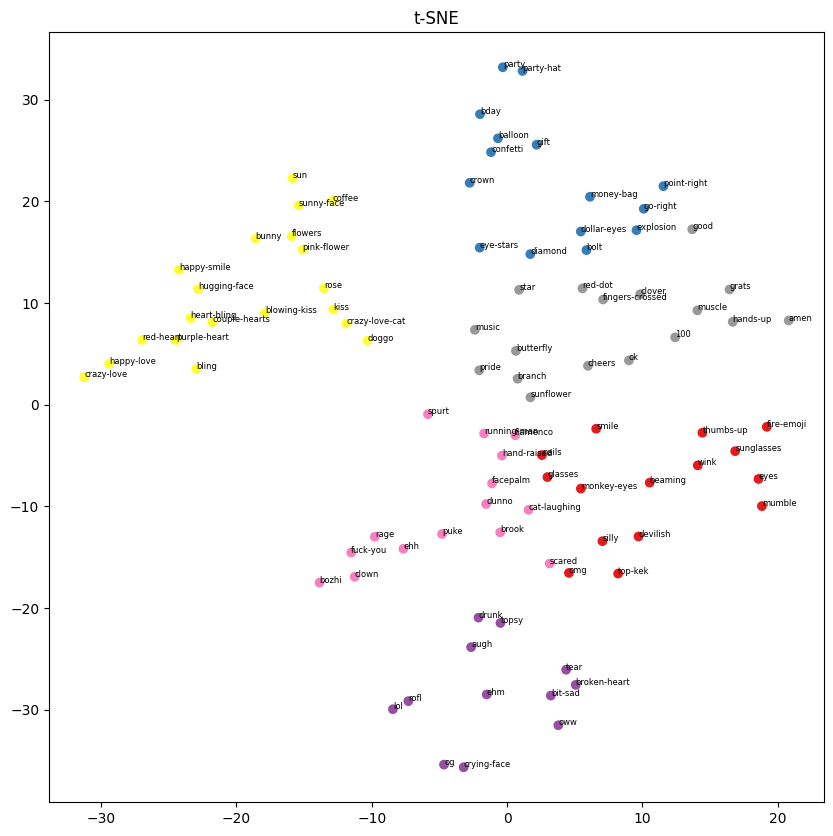

In [29]:
X = df_quality['mixed_features-light'].tolist()
X = np.array(X)

n_samples, n_features = X.shape

print(X.shape)

X = X.reshape(n_samples, -1)

X_embedded = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=['tsne_feature1', 'tsne_feature2'])

df_tsne['emoji_name'] = df_quality['name'].tolist()
df_tsne['emoji'] = df_quality.index
df_tsne['cluster'] = df_quality['light_clusters'].tolist()


plt.figure(figsize=(10, 10))

plt.scatter(df_tsne['tsne_feature1'], df_tsne['tsne_feature2'], c=df_tsne['cluster'], cmap='Set1')

# Set labels and title
plt.title('t-SNE')

for i, txt in enumerate(df_tsne['emoji_name']):
    plt.annotate(txt, (df_tsne['tsne_feature1'][i], df_tsne['tsne_feature2'][i]), fontsize=6)


plt.show()

(94, 194)


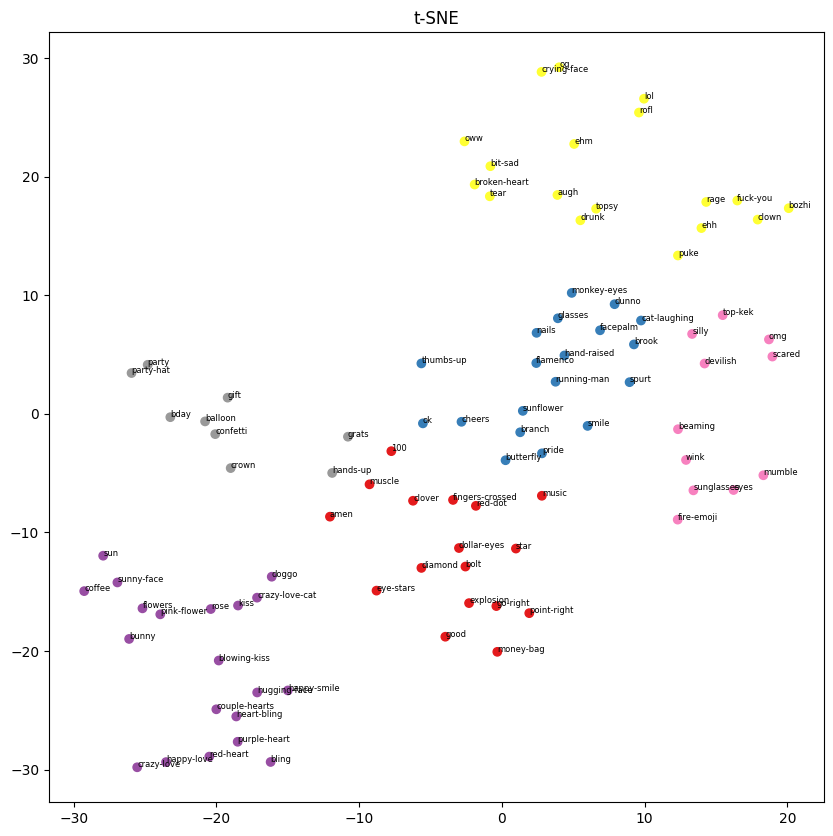

In [30]:
X = df_quality['mixed_features-medium'].tolist()
X = np.array(X)

n_samples, n_features = X.shape

print(X.shape)

X = X.reshape(n_samples, -1)

X_embedded = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=['tsne_feature1', 'tsne_feature2'])

df_tsne['emoji_name'] = df_quality['name'].tolist()
df_tsne['emoji'] = df_quality.index
df_tsne['cluster'] = df_quality['medium_clusters'].tolist()

plt.figure(figsize=(10, 10))

plt.scatter(df_tsne['tsne_feature1'], df_tsne['tsne_feature2'], c=df_tsne['cluster'], cmap='Set1')

# Set labels and title
plt.title('t-SNE')

for i, txt in enumerate(df_tsne['emoji_name']):
    plt.annotate(txt, (df_tsne['tsne_feature1'][i], df_tsne['tsne_feature2'][i]), fontsize=6)


plt.savefig('multi-tsne.jpg')

(94, 194)


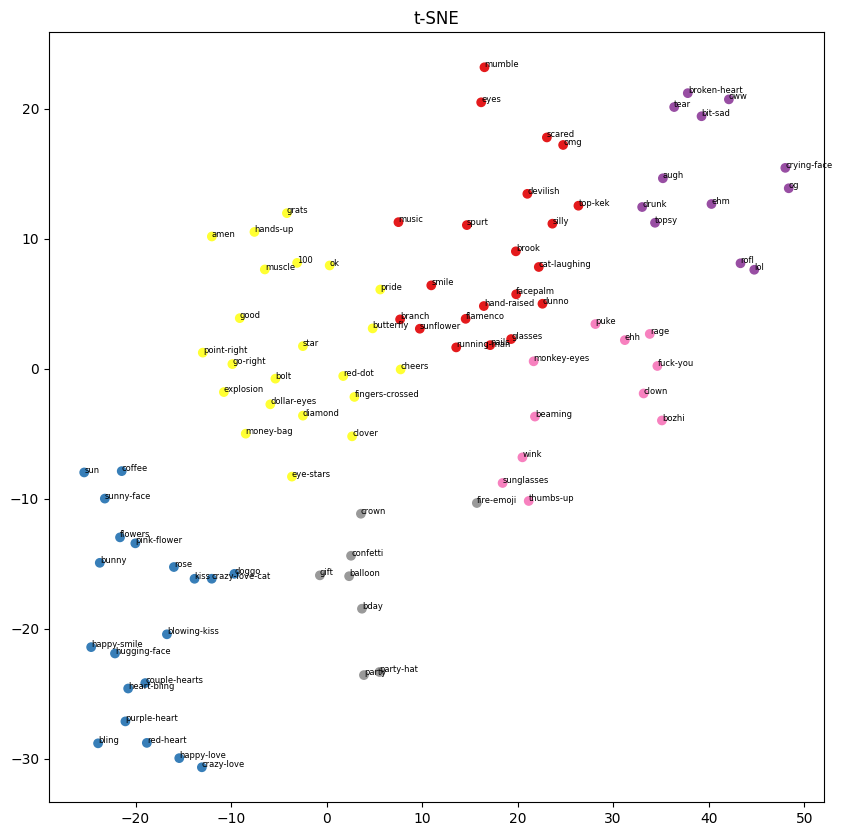

In [31]:
X = df_quality['mixed_features-heavy'].tolist()
X = np.array(X)

n_samples, n_features = X.shape

print(X.shape)

X = X.reshape(n_samples, -1)

X_embedded = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_embedded, columns=['tsne_feature1', 'tsne_feature2'])

df_tsne['emoji_name'] = df_quality['name'].tolist()
df_tsne['emoji'] = df_quality.index
df_tsne['cluster'] = df_quality['heavy_clusters'].tolist()

plt.figure(figsize=(10, 10))
plt.scatter(df_tsne['tsne_feature1'], df_tsne['tsne_feature2'], c=df_tsne['cluster'], cmap='Set1')

# Set labels and title
plt.title('t-SNE')

for i, txt in enumerate(df_tsne['emoji_name']):
    plt.annotate(txt, (df_tsne['tsne_feature1'][i], df_tsne['tsne_feature2'][i]), fontsize=6)


plt.show()